## I-94 Traffic Data Project

In this project we take a look at data regarding the l-94 interstate highway and try to predict certain indicators of heavy traffic. The goal of this project is to be able to raise issues that might be causing the most traffic and help braistorm ideas to prevent them.

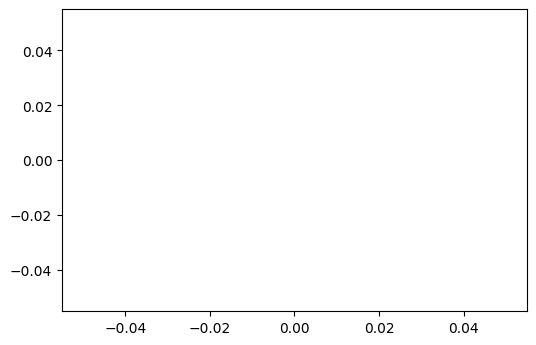

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot()
plt.show()

In [2]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
metro.head(5) # first five rows

metro.tail(5) # last five rows 

metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


It is worth noting that the station which performed the recording for this dataset only recorded the cars moving westbound from Saint Paul to Minneapolis. This means we cannot generaliz the results as they do not pertain to both incoming and ongoing traffic.

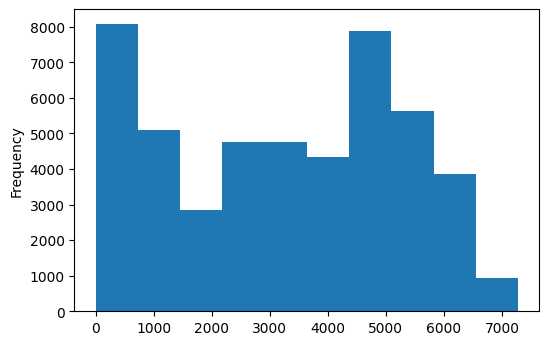

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
metro['traffic_volume'].plot.hist()
plt.show()

metro['traffic_volume'].describe()

Looking at the above histogram and descriptive statistics we can see frequency distribution of traffic volume in the state. 0-1000 has the largest frequency, which could be due to large use zeros in the column. In addition, when we look at the describe() output we see that the min value is indeed 0, which says that there many instacnes where the real value was not recorded correctly. In addition, traffic values between 5000 and 6000 were recorded with a high frequency of roughly 8000. This intersate tends to get traffic jams. Finally, the time of day does have an influence on traffic volumes, which we will see next.

# Day vs Night Traffic

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [5]:
metro['date_time'] = pd.to_datetime(metro['date_time'])


day = metro.copy()[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
print(day.shape) # day component

night = metro.copy()[(metro['date_time'].dt.hour >= 19) | (metro['date_time'].dt.hour < 7)]
print(night.shape) # night component

(23877, 9)
(24327, 9)


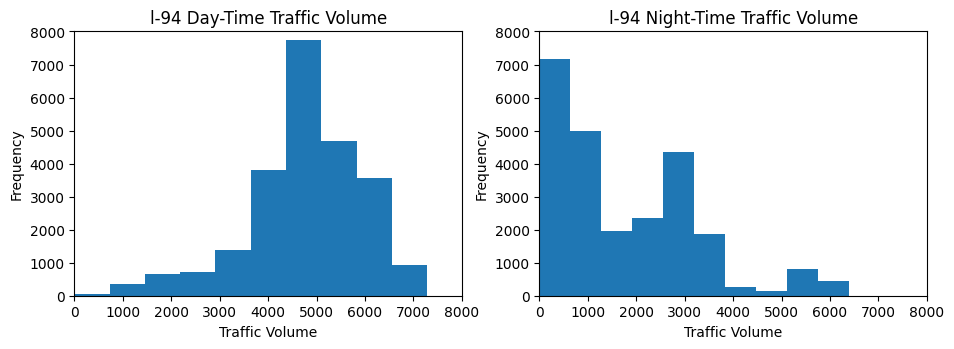

In [6]:
plt.figure(figsize=(11,3.5))


plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('l-94 Day-Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0,8000)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('l-94 Night-Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(0,8000)
plt.ylim(0,8000)

plt.show()




In [7]:
day['traffic_volume'].describe()



count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The graphs are almost reflections of each other. The graph on the left (Day time traffic volume) is skewed to the left with values concentrated on the right side. This tells us that day-time traffic on the interstate is very high compared to the night time graph that is skewed to the right (night time traffic is fairly low). In addition, day-time traffic has a mean of 4762 with the interstate recording rougly 5559 vehicles 75% of the time. For the night time, 75% of the time only 2819 vehicles were recorded on the interstate. Using this information we can drop the night data and focus on the day in order to predict heavy traffic. 

# Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. We will use the groupby function to look at the plot using each of the time measures.

## Month of The Year

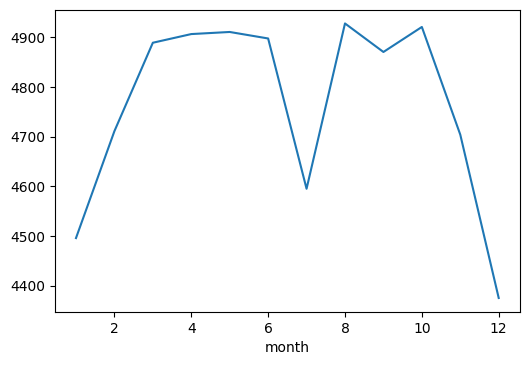

In [9]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()

The plot above shows the relationship between the month of the year and the volume of day traffic associated with it. We can see a clear dip in traffic from november to december (holdiday season). After that, the traffic volume tends to normalize after that. However, there is a slight abnormal dip in traffic from June to July. 

## Day of The Week

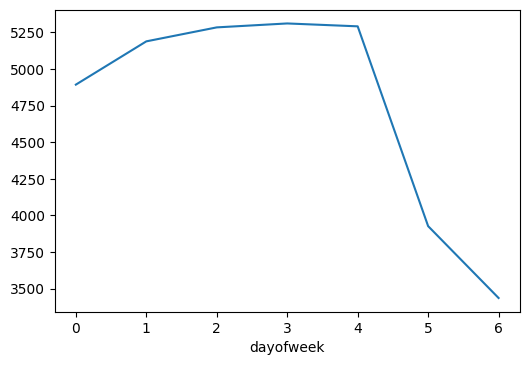

In [10]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()

Traffic in the weekday follows an intuitive pattern. Volume is increasing at a decreasing rate from monday to friday (workdays) and suddenly plummet once the weekends begin. Overall, weekends are much less traffic congested than weekdays

## Time of The Day

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(1000.0, 6500.0)

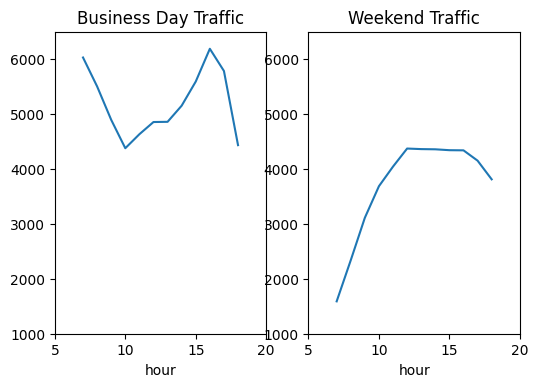

In [19]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

plt.figure()

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Day Traffic')
plt.xlim(5,20)
plt.ylim(1000,6500)



plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend Traffic')
plt.xlim(5,20)
plt.ylim(1000,6500)



At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

# Weather Indicators 

We will use the weather-related variables to find the correlation between weather and traffic. Looking at the column facts, we see that the numerical weather variables are: temp, rain_1h, snow_1h, and clouds_all.

In [20]:
day.corr()['traffic_volume'] # shows the correlation between traffic vokume and all other variables in the dataframe.

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

(240.0, 330.0)

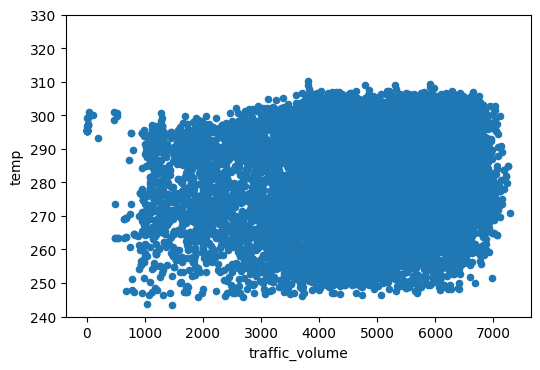

In [24]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(240,330)

Looking at the scatter above, there seems to be no concrete correlation between traffic and temperature.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

In [32]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()



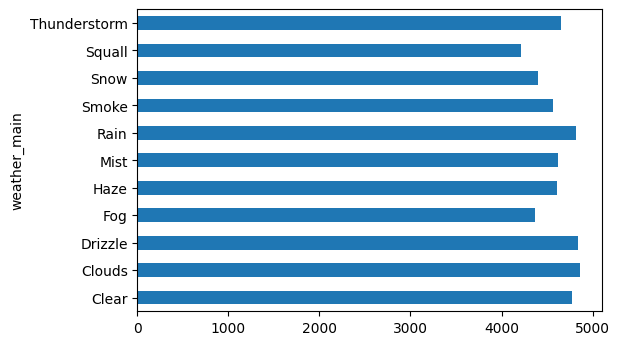

In [33]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There is no traffic volume exceeding 5000. overall, the rain and thunderstorm contribute to the most traffic, however, it is not substantial.

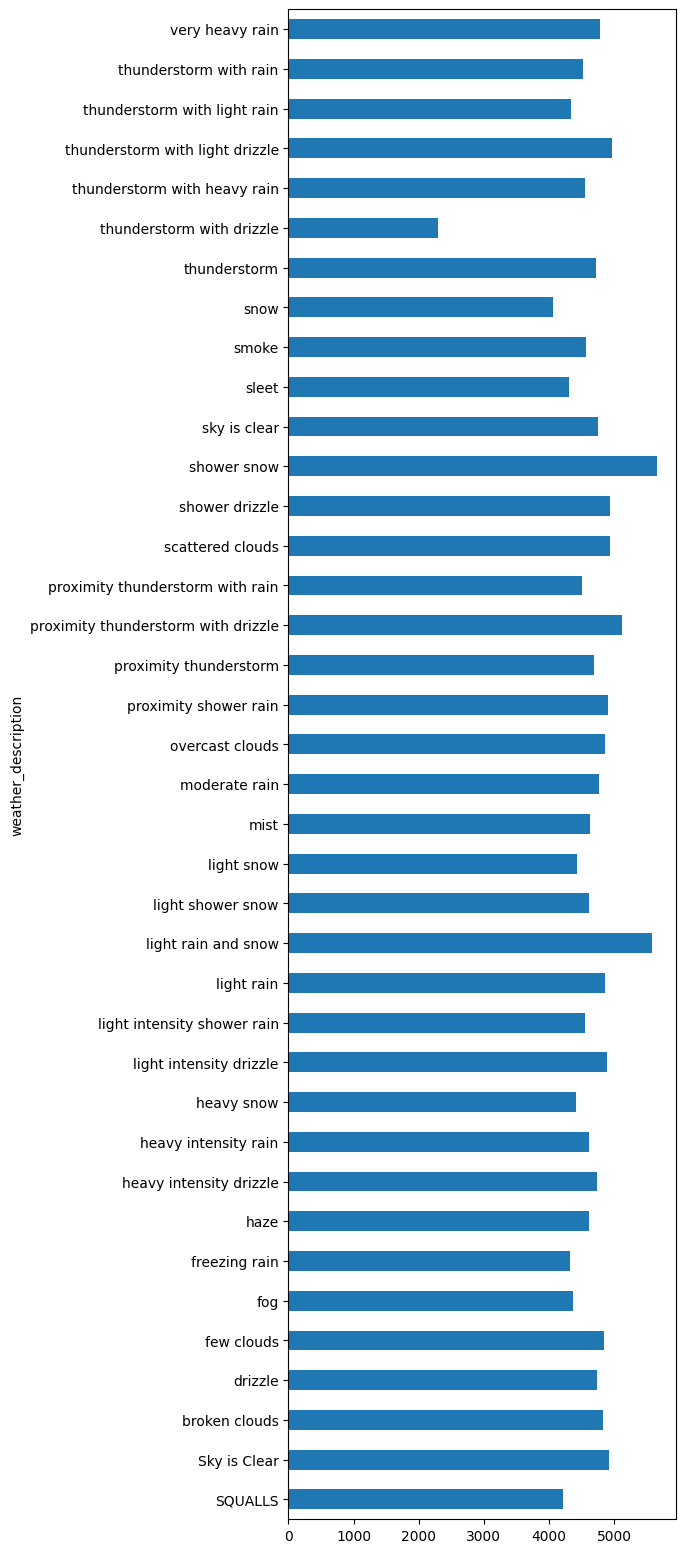

In [41]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,20))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

Using graphs and plots in Matplotlib we were able to explore traffic volume indicators with visual aid. In this project we discovered: 

Time indicators

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle